Легенда:
Компания ООО "Ромашка" установила на входе в Торговый центр "презентационные столы со своей продукцией" и выдавали на входе рекламные листки А и В ( с акцентированием внимание на различные  особенности своей продукции - "различное описание продукции") в течении одного дня. При этом было роздано равное количество рекламных листков и выдавались они в случайном порядке ( при выдаче на листке проставлялся порядковый номер и фиксировалось какое рекламное объявление на этом листке ).  При этом было подсчитано количество посетителей подошедших к столам ( критерием подхода к столу было предьявление листка). Т.е. если листок с таким то порядковым номером предъявлялся при подходе к столу, то в реестре напротив порядкового номера этого листка указывалось какое рекламное объявление было на нем и  записывалась "1". Напротив всех не сданных листков было проставлено "0"/
Цель эксперимента: Проверить влияет ли как то "различное описание продукции" на эффективность рекламы.
Метрикой для проверки будет рассматриваться среднее количество обращений посетителей. У нас имеется две выборки ( А,В ) из генеральной совокупности "все посетители торгового центра".
Для оценки среднего значения разделим каждую выборку ( А,В ) на 10 равных частей ( по 100 случаев). Т.к. считается что все спбытия в выборки случайны, то будем считать что простое разделение на 10 групп не нарушит "случайность" наших новых подвыборок. Для каждой выборки (А,В) будем оценивать среднее значение средних значений в подвыборках. И затем проверять гипотезу для этих средних значений  "средних значений для подвыборок" двух выборок А,В.

Гипотеза H0 - "различное описание продукции" не влияет на эффективность рекламы. Т.е. Средние значения для выборок являюся средними выборок из одной генеральной совокупности.
Альтернативная гипотеза H1 -"различное описание продукции" влияет на эффективность рекламы. Т.е. различия между средними являются статистически существенными .
Метод проверки гипотезы: применение t-теста ( двустроннего т.к. "изменения" текста рекламы могут привести как к улучшению, так и к ухудшению. Дополнительно проведем проверку с использованием критерия Фишера ( f - теста)
Двустронний уровень значимости 0,05


In [1]:
from  math import sqrt
import numpy as np
import pandas as pd
import scipy.stats as sps

df = pd.read_csv('ad.csv')
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [127]:
from statistics import mean, stdev
df_A = [] # список с результатами для варианта А
df_B = [] # список с результатами для варианта В
for i in range(10):
    df_A.append(list(df[df['ad_id']=='A']['action'][i*100:(i+1)*100])) # Выборка для варианта А
    df_B.append(list(df[df['ad_id']=='B']['action'][i*100:(i+1)*100])) # Выборка для варианта В
df_A_means = [] # массив средних значений для подвыборок варианта А
df_B_means = [] # массив средних значений для подвыборок варианта В
for i in range(10):
    df_A_means.append(mean(df_A[i]))
    df_B_means.append(mean(df_B[i]))
    
df_A_mean =mean(df_A_means) # Среднее значение средних значений подвыборок варианта А
df_A_stdev = stdev(df_A_means) # стандартное отклонение для среднего подвыборок варианта А
       
df_B_mean = mean(df_B_means) # Среднее значение средних значений подвыборок варианта В
df_B_stdev = stdev(df_B_means) # стандартное отклонение для среднего подвыборок варианта А
print(f"оценка среднего для варианта А - {df_A_mean}")
print(f"оценка стандартного отклонения для варианта А - {df_A_stdev}")
print(f"оценка среднего для варианта B - {df_B_mean}")
print(f"оценка стандартного отклонения для варианта B - {df_B_stdev}")

оценка среднего для варианта А - 0.304
оценка стандартного отклонения для варианта А - 0.027968235951204044
оценка среднего для варианта B - 0.372
оценка стандартного отклонения для варианта B - 0.032591750830880846


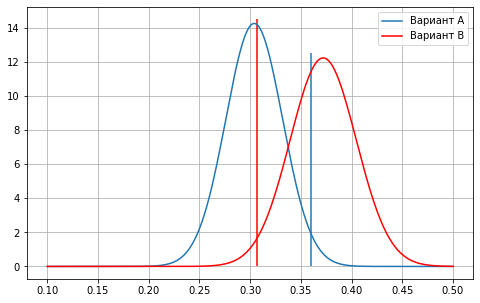

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.linspace(0.1, 0.5, 200)
plot_A = sps.norm.pdf(x,df_A_mean, df_A_stdev)
plot_B = sps.norm.pdf(x, df_B_mean, df_B_stdev)
ax.plot(x, plot_A, label ='Вариант А')
ax.plot(x, plot_B, label = 'Вариант В', color ='r')
ax.legend()

fig.set_figheight(5)
fig.set_figwidth(8)
ax.grid()
ax.vlines(df_A_mean+2*df_A_stdev,0,12.5)
ax.vlines(df_B_mean-2*df_B_stdev, 0,14.5, color = 'r')
plt.show()




In [ ]:
# Сделаем предположение: т.к. средние значения отличаюся значительно ( отличие примерно 22%), 
# а размер выборок очень большой ( 1000), то гипотеза H0 с большой вероятностью будет отклоненна
# Кроме того, из "оценочных" графиков распределения средних сумм подвыборок ( распределение должно быть
# нормальным по центральной предельной теореме ) видно что оценка среднего каждой выборки
#( матожидание распределений) не попадают в 95% доверительные интервалы соседних распределений)

In [120]:
# Проводим необходимые расчеты для проведения оценки с помощью t-статистики
t_val = (abs(df_B_mean-df_A_mean))/sqrt((df_A_stdev**2+df_B_stdev**2/len(df_A))) # расчет t -тестовое
print(f"t-тестовое = {t_val}")
dof =  2*len(df_A) - 2 # определение степеней свободы для t -распределения 
p_val = 0.05 # двустронний уровень значимости для принятия решения
t_stat = sps.t.ppf(1- p_val/2, df = dof) # получаем t- расчетное
p_stat = 2*(1 - sps.t.cdf(t_val, df = dof)) # получаем двусторонний уровень значимости расчетный
print(f"t расчетное ={t_stat}")
print(f"P-Уровень значимости расчетный = {p_stat}")
print(f"P-уровень значимости принятый = {p_val}")


t-тестовое = 2.2813597482971804
t расчетное =2.10092204024096
P-Уровень значимости расчетный = 0.03491920816971583
P-уровень значимости принятый = 0.05


In [ ]:
Вывод: Проверка гипотезы H0 по критерию Стьюдента показала что нет достаточных оснований
    принимать нулевую гипотезу об отсутствии влияния изменения текста рекламного объявления
    на эффективность рекламы. Т.е. скорее всего внесенные изменения заметно влияют на 
    эффективность рекламы

In [126]:
#Применим дисперсионный анализ ( критери фишера) ( проверяем гипотезу о том что нет различий
#между выборками)
n_gr = 2 # количество групп
n_vibor = 2*(len(df_A)-1) # размер выборки
s2_vnu = (df_A_stdev**2 + df_B_stdev**2)/2 # дисперсия внутригрупповая
x_aver = (df_A_mean + df_B_mean)/2 # среднее двух выборочных средних
s2_aver = ((df_A_mean- x_aver)**2 + (df_B_mean - x_aver)**2)/(n_gr-1) # дисперсия выборочного среднего
s2_megr = n_vibor * s2_aver # дисперсия межгруповая
f_vibor = s2_megr/s2_vnu # рассчитывает критерий Фишера для эксперимента
f_rash = sps.f.ppf(p_val, dfn = n_gr, dfd = n_vibor)
p_val_rash = 1 - sps.f.cdf(f_vibor, dfn = n_gr-1, dfd = n_vibor)
print(f"f - тестовое = {f_vibor}")
print(f"f - расчетное ={f_rash}")
print(f"P-Уровень значимости расчетный = {p_val_rash}")
print(f"P-уровень значимости принятый = {p_val}")

f - тестовое = 45.125783132530124
f - расчетное =0.05143973924473376
P-Уровень значимости расчетный = 2.681962619766054e-06
P-уровень значимости принятый = 0.05


In [ ]:
Вывод: Проверка гипотезы H0 по критерию Фишера показала что нет достаточных оснований
    принимать нулевую гипотезу об отсутствии влияния изменения текста рекламного объявления
    на эффективность рекламы. Т.е. скорее всего внесенные изменения заметно влияют на 
    эффективность рекламы 